In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:

class Player:
    #location is a length two numpy array
        
    def __init__(self, location = np.array([0,0])):
        self.location = location
        self.points = 0
        self.next_location = np.zeros(2)
        self.order_index = 0
        
    def Move_Player_To_Location(self,new_location):
        self.location = new_location
        
    def Shift_Player(self,shift_distance):
        self.location = np.add(self.location, shift_distance)
        
    def Get_Distance_From_Location(self, location):
        return np.linalg.norm(self.location - location)
    
    def Get_Distance_From_Player(self, adversary):
        return self.Get_Distance_From_Location(adversary.location)
    
    def Add_Point(self):
        self.points += 1
        

def player_to_player_vector(player, adversary):
    return adversary.location - player.location
vector = np.zeros[4]
vector[2] = yaw
vector[3] = height
def loop(player, adversary, func):
    count = 0
    while count < 10:
        count += 1
        vector[0], vector[1] = player_to_player_vector(player, adversary)\ 
        func(vector[0], vector[1], vector[2], vector[3])
        time.sleep(1)
        
        

player = Player()
adversary = Player()

loop(player, adversary)
    

    
    

        
    

In [3]:
def go_to_random_rally_point(player, adversary, rally_points, order):
    if(not player.next_location.all()):
        player.next_location = rally_points[np.random.randint(0, len(rally_points))]
        
    
    near_point = player.Get_Distance_From_Location(player.next_location) < 0.2
    if not near_point:
        direction = player.next_location - player.location
        direction = direction
        return direction
    else:
        player.next_location = np.zeros(2)
        return player.next_location
    
def go_to_rally_points_in_deterministic_order(player, adversary, rally_points, order):
    if(not player.next_location.all()):
        player.next_location = rally_points[order[player.order_index]]
        
    
    near_point = player.Get_Distance_From_Location(player.next_location) < 0.2
    if not near_point:
        direction = player.next_location - player.location
        direction = direction
        return direction
    else:
        player.next_location = np.zeros(2)
        player.order_index = (player.order_index + 1) % len(order)
        return player.next_location
    
def completeley_random(player,adversary, rally_points, order):
    return np.random.randn(2)

def follow_adversary(player, adversary, rally_points):
    return adversary.location - player.location

def follow_adversary_with_noise(player, adversary, rally_points):
    return adversary.location - player.location + np.random.randn(2) * 1.1

def closest_point_to_adversary(player, adversary, rally_points, order):
    close_rp = (0,0)
    min_dist = 999999
    for rp in rally_points:
        dist = adversary.Get_Distance_From_Location(rp)
        if dist < min_dist:
            close_rp = rp
            min_dist = dist
    return close_rp - player.location

def farthest_point_from_tandem(player, adversary, rally_points, order):
    close_rp = (0,0)
    min_dist = 0
    for rp in rally_points:
        dist = adversary.Get_Distance_From_Location(rp)
        if dist > min_dist:
            close_rp = rp
            min_dist = dist
    return close_rp - player.location
    

In [4]:
def step(tandem, adversary, tandem_shift, adversary_shift, rally_points):
    increment_point = False
    player_adversary_distance_limit = 2
    adversary_to_rally_point_max_distance = .2
    for rp in rally_points:
        if(adversary.Get_Distance_From_Location(rp) < adversary_to_rally_point_max_distance and 
           adversary.Get_Distance_From_Player(tandem) > player_adversary_distance_limit):
            increment_point = True
    if increment_point:
        adversary.Add_Point()
    if(np.linalg.norm(tandem_shift) > 0):
        tandem.Shift_Player(tandem_shift/np.linalg.norm(tandem_shift)/3)
        
    if (np.linalg.norm(adversary_shift) > 0):
        adversary.Shift_Player(adversary_shift/np.linalg.norm(adversary_shift)/3)

In [17]:
def simulation(num_iters, tandem_strategy, enemy_strategy, tandem_order, adversary_order, 
               deterministic = False, follow_enemy = False):
    count = 0
    scores = np.zeros(num_iters[0])
    for y in range(num_iters[0]):
        tandem = Player(np.array([0,0]))
        adversary = Player(np.array([6,6]))
        point_locations = np.empty(2)
        rally_points = np.array([[1,1], [6,1], [3,3], [1, 2], [5, 5]])
        a_locations = tandem.location
        b_locations = adversary.location
        if(deterministic):
            tandem_order = np.linspace(0, rally_points.shape[0] - 1, num = rally_points.shape[0]).astype(int)
            adversary_order = np.linspace(0, rally_points.shape[0] - 1, num = rally_points.shape[0]).astype(int)
            np.random.shuffle(tandem_order)
            np.random.shuffle(adversary_order)
        for x in range(num_iters[1]):
            count += 1
            
            points = adversary.points
            if follow_enemy:
                step(tandem, adversary, tandem_strategy(tandem, adversary, rally_points), 
                     enemy_strategy(adversary, tandem, rally_points, adversary_order), rally_points)
            else:
                step(tandem,adversary,tandem_strategy(tandem, adversary, rally_points, tandem_order),
                 enemy_strategy(adversary, tandem, rally_points, adversary_order), rally_points)
            
            a_locations = np.vstack((a_locations, tandem.location))
            b_locations = np.vstack((b_locations, adversary.location))
            if points < adversary.points:
                point_locations = np.vstack((point_locations, adversary.location))
        scores[y] = adversary.points
            
    print("Enemy Points: " + str(adversary.points))
    point_locations = point_locations[1:]
    plt.plot(a_locations.T[0], a_locations.T[1], color = "orange")
    plt.plot(b_locations.T[0], b_locations.T[1], color = "blue")
    if(adversary.points > 0):
        plt.scatter(point_locations.T[0], point_locations.T[1], color = "red")
    plt.scatter(rally_points.T[0], rally_points.T[1], color = "green")
    plt.show()
    plt.hist(scores, bins = 20)
    plt.show()
    print("Mean of Scores: " + str(np.mean(scores)))
    print("Standard Deviation of Scores: " + str(np.std(scores)))

Random vs Random
Enemy Points: 41


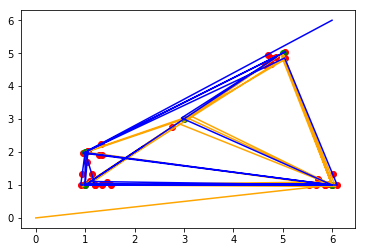

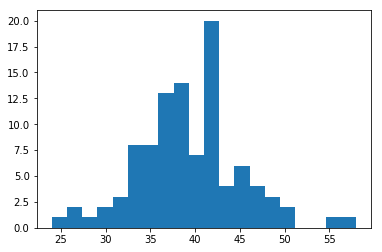

Mean of Scores: 39.21
Standard Deviation of Scores: 5.675024229023168
Closest adversary point vs random
Enemy Points: 11


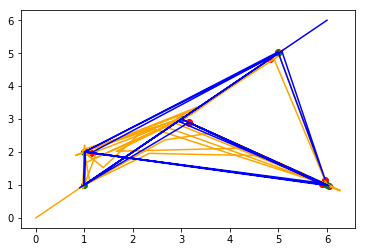

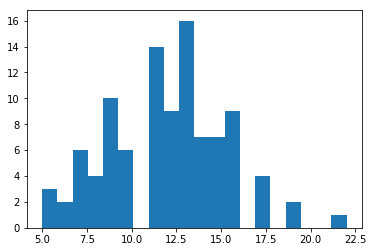

Mean of Scores: 11.96
Standard Deviation of Scores: 3.3314261210478606
Random vs avoid player
Enemy Points: 54


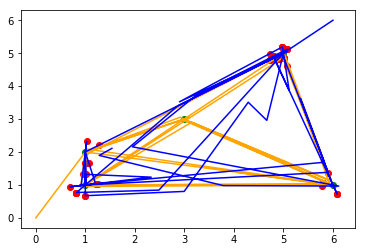

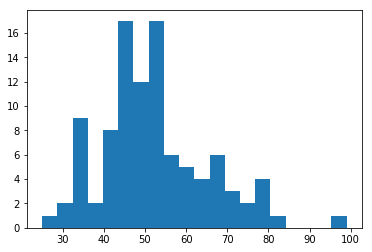

Mean of Scores: 52.25
Standard Deviation of Scores: 13.057086198689202
Closest adversary point vs avoid player
Enemy Points: 4


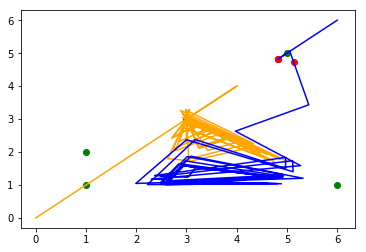

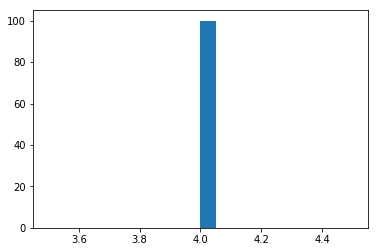

Mean of Scores: 4.0
Standard Deviation of Scores: 0.0


In [19]:
num_iters = [100,300]
print("Random vs Random")
simulation(num_iters,go_to_random_rally_point, go_to_random_rally_point, np.zeros(2), None)
print("Closest adversary point vs random")
simulation(num_iters,closest_point_to_adversary, go_to_random_rally_point, np.zeros(2), None)
print("Random vs avoid player")
simulation(num_iters,go_to_random_rally_point, farthest_point_from_tandem, np.zeros(2), None)
print("Closest adversary point vs avoid player")
simulation(num_iters,closest_point_to_adversary, farthest_point_from_tandem, np.zeros(2), None)


Deterministic Player
Enemy Points: 48


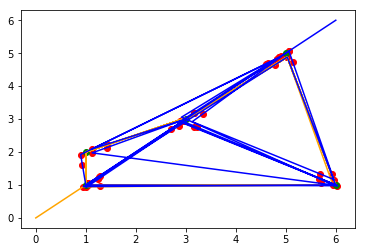

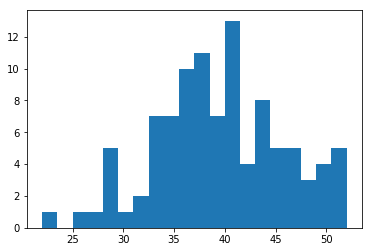

Mean of Scores: 39.29
Standard Deviation of Scores: 6.329763028739701
Deterministic Player vs Avoiding Adversary
Enemy Points: 59


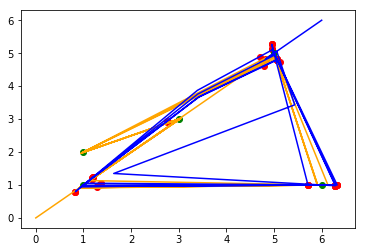

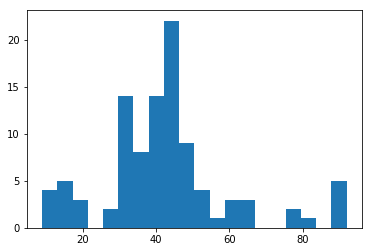

Mean of Scores: 42.42
Standard Deviation of Scores: 17.741014627128855


In [631]:
print("Deterministic Player")
simulation(num_iters,go_to_rally_points_in_deterministic_order, 
           go_to_random_rally_point, tandem_order, None, deterministic = True)
print("Deterministic Player vs Avoiding Adversary")
simulation(num_iters,go_to_rally_points_in_deterministic_order, 
           farthest_point_from_tandem, tandem_order, None, deterministic = True)





Completely Random
Enemy Points: 4


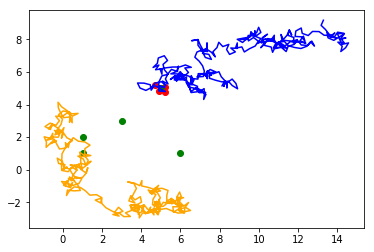

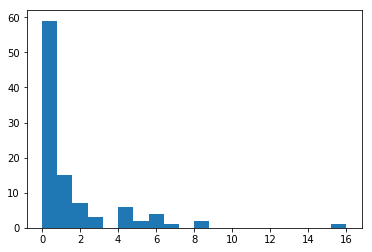

Mean of Scores: 1.35
Standard Deviation of Scores: 2.471335671251479


In [629]:
print("Completely Random")
simulation(num_iters,completeley_random, 
           completeley_random, tandem_order, None, deterministic = True)

Follow Adversary
Enemy Points: 0


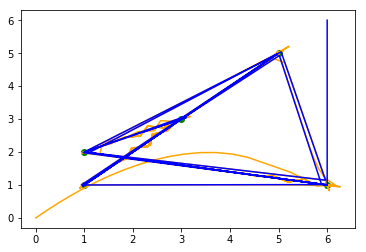

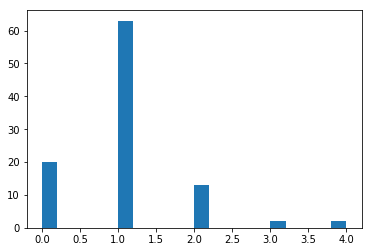

Mean of Scores: 1.03
Standard Deviation of Scores: 0.7675285010994705
Follow Adversary with 10% noise
Enemy Points: 12


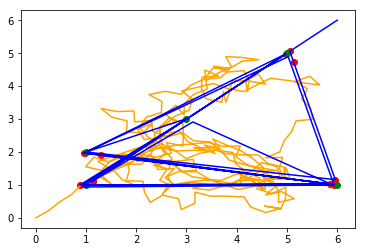

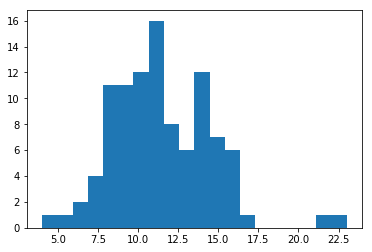

Mean of Scores: 11.37
Standard Deviation of Scores: 3.2300309596039476


In [623]:
print("Follow Adversary")
simulation(num_iters, follow_adversary, 
           go_to_random_rally_point, tandem_order, None, follow_enemy = True)
print("Follow Adversary with 10% noise")
simulation(num_iters, follow_adversary_with_noise, 
           go_to_random_rally_point, tandem_order, None, follow_enemy = True)

In [463]:

tandem_pts = np.array([[1, 0],[1, 0],[0, -1],[0, 1],[1, 0],[0, 1],[-1, 0],[-1, 0],[0, 1],
                           [1, 0],[1, 0],[0, -1],[1, 0],[0, 1],[1, 0],[-1, 0],[-1, 0],[1, 0],[-1, 0],
                           [-1, 0],[1, 0],[-1, 0],[0, 1],[1, 0],[1, 0],[1, 0],[0, 1],[1, 0],[1, 0],[0, -1]])

x = "(0, -1) (0, -1) (0, -1) (0, -1) (-1, 0)(-1, 0)(-1, 0)(-1, 0)(0, 1)(0, 1)(0, 1)(0, 1)(1, 0)(1, 0)(1, 0)(1, 0)(0, -1)(0, -1)(0, -1)(0, -1)(-1, 0)(-1, 0)(-1, 0)(-1, 0)(0, 1)(0, 1)(0, 1)(0, 1)(1, 0)(1, 0)"
x = x.replace("(", " ", )
x = x.replace(")", " ")
x = x.replace(",", " ")
x = x.replace("  ", ",")
enemy_pts = np.fromstring(x, dtype=int, sep=',').reshape(30,2)



In [491]:
num_iters = num_iters = [1,30]
def simulation_df(num_iters, tandem_strategy, enemy_strategy):
    scores = np.zeros(num_iters[0])
    for y in range(num_iters[0]):
        tandem = Player(np.array([0,1]))
        adversary = Player(np.array([5,5]))
        point_locations = np.empty(2)
        rally_points = np.array([[3,3], [2,2], [2,4], [4, 2], [4, 4]])
        a_locations = tandem.location
        b_locations = adversary.location
        count = 0
        for x in range(num_iters[1]):
            points = adversary.points
            step(tandem,adversary,tandem_strategy[count],
                 enemy_strategy[count], rally_points)
            
            a_locations = np.vstack((a_locations, tandem.location))
            b_locations = np.vstack((b_locations, adversary.location))
            if points < adversary.points:
                point_locations = np.vstack((point_locations, adversary.location))
            count += 1
        scores[y] = adversary.points
        
    print("Enemy Points: " + str(adversary.points))
    point_locations = point_locations[1:]
    plt.plot(a_locations.T[0], a_locations.T[1], color = "orange")
    plt.plot(b_locations.T[0], b_locations.T[1], color = "blue")
    if(adversary.points > 0):
        plt.scatter(point_locations.T[0], point_locations.T[1], color = "red")
    plt.scatter(rally_points.T[0], rally_points.T[1], color = "green")
    plt.show()
    
    plt.hist(scores, bins = 20)
    print("Mean of Scores: " + str(np.mean(scores)))
    print("Standard Deviation of Scores: " + str(np.std(scores)))

Enemy Points: 0


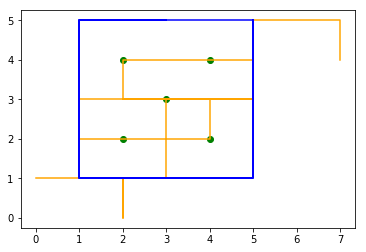

Mean of Scores: 0.0
Standard Deviation of Scores: 0.0


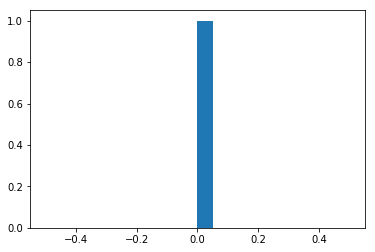

In [492]:
simulation_df(num_iters, tandem_pts, enemy_pts)